In [1]:
from simulator.bb84 import simulation_bb84
from tqdm import tqdm
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [12]:
# Create an empty list to store the dictionaries
results_list = []

for i in range(20):
    
    for qber in tqdm(arange(start=0.01, stop=0.16, step=0.01)):
        simulation_results = simulation_bb84(
            alice_basis_length=10000,
            disturbance_probability=qber,
            cascade_n_passes=4
        )
        
        # Append the results as a new dictionary to the list
        new_row = {
            'qber': qber,
            'final error rate': simulation_results.get('error rate'),
            'error estimate': simulation_results.get('error estimate'),
            'initial key length': simulation_results.get('key length history').get('qubits'),
            'key length after sifting': simulation_results.get('key length history').get('sifting'),
            'key length after err est': simulation_results.get('key length history').get('error estimation'),
            'key length after err corr': simulation_results.get('key length history').get('error correction')
        }
        results_list.append(new_row)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


In [13]:
results_df.sample(10)

,qber,final error rate,error estimate,initial key length,key length after sifting,key length after err est,key length after err corr
163,0.14,0.031873,0.096534,10000,5013,4018,1004
274,0.05,0.009407,0.032589,10000,5104,4122,1382
152,0.03,0.002825,0.013391,10000,5016,4039,2832
70,0.11,0.021472,0.062788,10000,4949,3914,978
225,0.01,0.002401,0.008138,10000,5031,4048,2916
87,0.13,0.027833,0.081660,10000,4994,4026,1006
226,0.02,0.002745,0.009978,10000,4954,3946,2550
194,0.15,0.024586,0.093390,10000,4962,3987,1993
78,0.04,0.004508,0.023939,10000,4951,3946,2662
113,0.09,0.010811,0.066046,10000,5011,3987,2035


Plotting results:

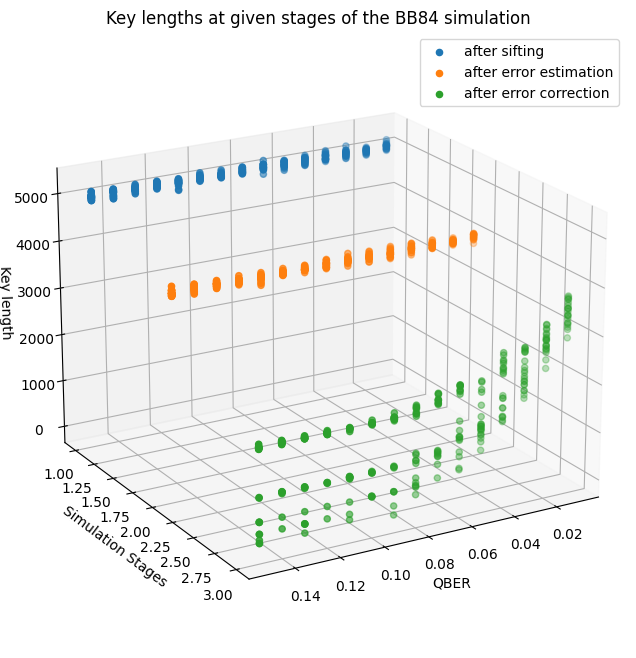

In [21]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for scatter plot
initial_params = results_df['qber']
stages = np.arange(1, 4)  # Assuming there are three stages in the simulation

# Scatter plot for Variable_1
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 1), 
    results_df['key length after sifting'], 
    label='after sifting'
)

# Scatter plot for Variable_2
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 2), 
    results_df['key length after err est'], 
    label='after error estimation'
)

# Scatter plot for Variable_3
ax.scatter(
    initial_params, 
    np.full_like(initial_params, 3), 
    results_df['key length after err corr'], 
    label='after error correction'
)

# Set labels for axes
ax.set_xlabel('QBER')
ax.set_ylabel('Simulation Stages')
ax.set_zlabel('Key length')

# Set plot title
plt.title('Key lengths at given stages of the BB84 simulation')

# Set the viewing point
ax.view_init(elev=20, azim=60)  # Adjust these values to change the viewing point

# Show the legend
ax.legend()

# Show the plot
plt.show()

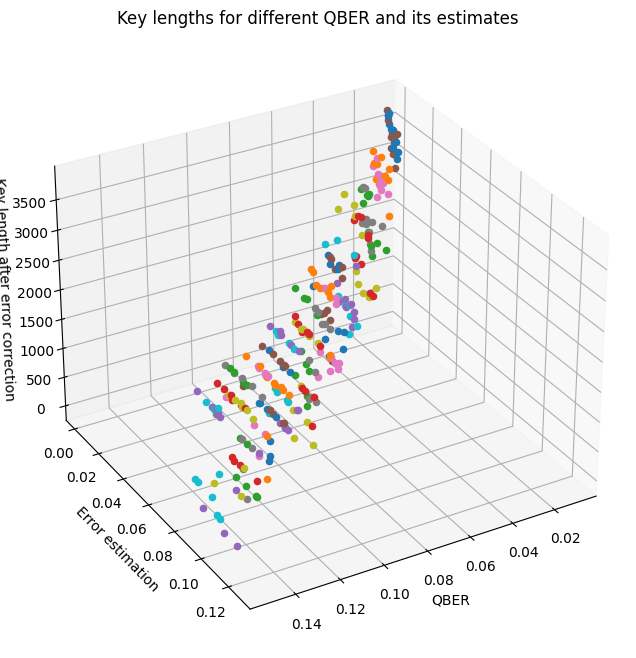

In [25]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for index, row in results_df.iterrows():
    xs = row['qber']
    ys = row['error estimate']
    zs = row['key length after err corr']
    ax.scatter(xs, ys, zs)

# Set labels for axes
ax.set_xlabel('QBER')
ax.set_ylabel('Error estimation')
ax.set_zlabel('Key length after error correction')

# Set plot title
plt.title('Key lengths for different QBER and its estimates')

# Set the viewing point
ax.view_init(elev=30, azim=60)  # Adjust these values to change the viewing point

# Show the plot
plt.show()

When I was analysing where the extra indexes in Bob's blocks had come from:

In [3]:
for block_set in results_list[-1].get('cascade history'):
    alice_blocks = block_set.get('Alice blocks')
    bob_blocks = block_set.get('Bob blocks')
    for i in range(len(bob_blocks)):
        alice_keys = list(alice_blocks[i].keys())
        bob_keys = list(bob_blocks[i].keys())
        if '161' in bob_keys:
            print("\nNew instance of 161 key found.")
            print(alice_keys)
            print(bob_keys)


New instance of 161 key found.
['161', '46', '7', '132', '171', '92']
['161', '46', '7', '132', '171', '92']

New instance of 161 key found.
['84', '45', '75', '60', '152', '172', '161', '164', '148', '109', '86', '203']
['84', '45', '75', '60', '152', '172', '161', '164', '148', '109', '86', '203']

New instance of 161 key found.
['66', '146', '34', '15', '193', '11', '173', '170', '108', '44', '59', '148', '102', '107', '140', '178', '71', '50', '0', '134', '196', '190', '161', '131']
['66', '146', '34', '15', '193', '11', '173', '170', '108', '44', '59', '148', '102', '107', '140', '178', '71', '50', '0', '134', '196', '190', '161', '131']

New instance of 161 key found.
['154', '204', '42', '4', '188', '46', '48', '55', '50', '58', '63', '10', '113', '140', '20', '51', '111', '93', '44', '183', '75', '96', '161', '117', '26', '202', '163', '91', '53', '54', '116', '29', '103', '118', '166', '156', '170', '88', '43', '187', '79', '143', '160', '123', '39', '152', '150', '83']
['154